In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df['Sale'] = np.where(df['Sales']> 8.0, 'High', 'Low')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [4]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 12)

In [5]:
data = df.iloc[:,1:]
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [6]:
company = pd.get_dummies(data.iloc[:,0:10])
company

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [7]:
company['Sale'] = data['Sale'].map({'High':1 ,'Low':0})
company

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sale
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0


In [8]:
company.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sale
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.240000,0.212500,0.547500,0.295000,0.705000,0.355000,0.645000,0.410000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.427618,0.409589,0.498362,0.456614,0.456614,0.479113,0.479113,0.492449
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Separating dependent and independent variables
#X = company.iloc[:,0:-1]
#y = company['Sale']

In [14]:
# Labels are the values we want to predict
y = np.array(company['Sale'])
# Remove the y from fraud data
company1 = company.drop(['Sale'], axis = 1)
# Saving feature names for later use
company_cols = list(company1.columns)
# Convert to numpy array because the algorithm works on arrays
X = np.array(company1)

In [15]:
num_trees = 200
kfold = KFold(n_splits=10, random_state=6, shuffle= True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=5)
model.fit(X,y)
results = cross_val_score(model, X, y, cv=kfold)
print(round(results.mean()*100,2),'%')

83.5 %


In [16]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(company1, round(importance, 2)) for company1, importance in zip(company_cols, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Price                Importance: 0.23
Variable: CompPrice            Importance: 0.11
Variable: Advertising          Importance: 0.11
Variable: Age                  Importance: 0.11
Variable: ShelveLoc_Good       Importance: 0.11
Variable: Income               Importance: 0.09
Variable: Population           Importance: 0.07
Variable: Education            Importance: 0.05
Variable: ShelveLoc_Bad        Importance: 0.05
Variable: ShelveLoc_Medium     Importance: 0.02
Variable: Urban_No             Importance: 0.01
Variable: Urban_Yes            Importance: 0.01
Variable: US_No                Importance: 0.01
Variable: US_Yes               Importance: 0.01


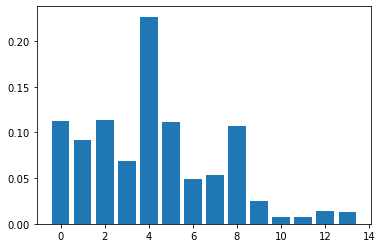

In [17]:
#plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()